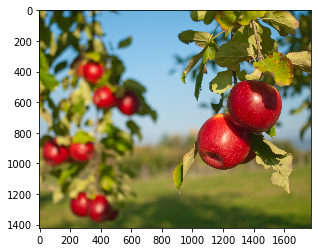

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\Admin\Desktop\apple.jpg")

img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_plt)

In [2]:
path_1 = r"C:\Users\Admin\Desktop\apple.jpg"

def extract_color_range(img_path, lower_vl, upper_vl, crc = 0):
    """
    img_path (str) : path to image
    lower_vl, upper_vl : 1D_array of 3 values H(0-180), S(0-255), V(0-255)
    crc (integer in (0, 255)) : complement_range_color. For example 0 for black and 255 for white
    """
    img = cv2.imread(img_path)
    
    ## convert the img_scr to HSV mode
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    ## put the range of green colors to the mask in HSV's mode
    mask_green = cv2.inRange(hsv_img, lower_vl, upper_vl)

    ## get the image_area which have the green_colors
    extract_range = cv2.bitwise_and(img, img, mask = mask_green)

    ## convert to RGB mode
    extract_range = cv2.cvtColor(extract_range, cv2.COLOR_BGR2RGB)

    ## covert the complement_range to any color
    extract_range_c = np.where( extract_range != [0, 0, 0], extract_range, 0)
    
    ## display
    return extract_range_c

0.059197839983262716


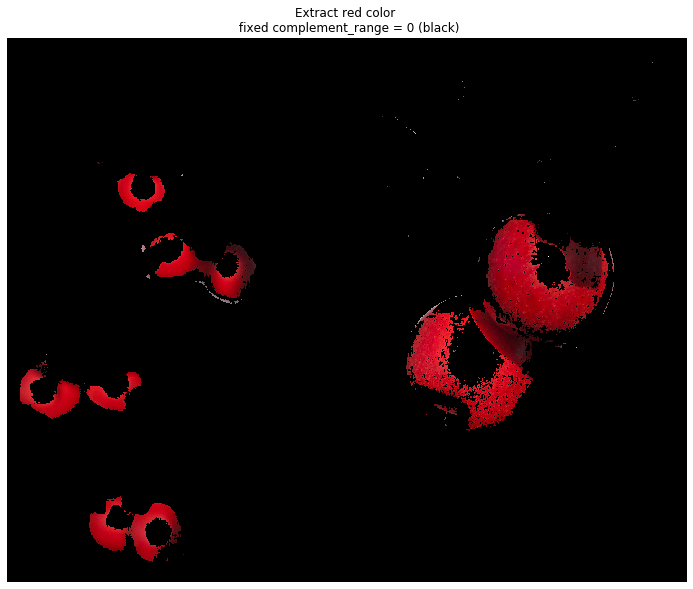

In [3]:
lower_red = np.array([121, 0, 0])
upper_red = np.array([180, 255, 255])

plt.figure(figsize = (15, 10))
b_green_RBG = extract_color_range(path_1, lower_red, upper_red)

tu = b_green_RBG[b_green_RBG != 0].shape[0]
ma = img.shape[0]*img.shape[1]
print(tu / (3*ma))

plt.imshow(b_green_RBG); plt.title('Extract red color \n fixed complement_range = 0 (black)')
plt.axis("off")
plt.show()

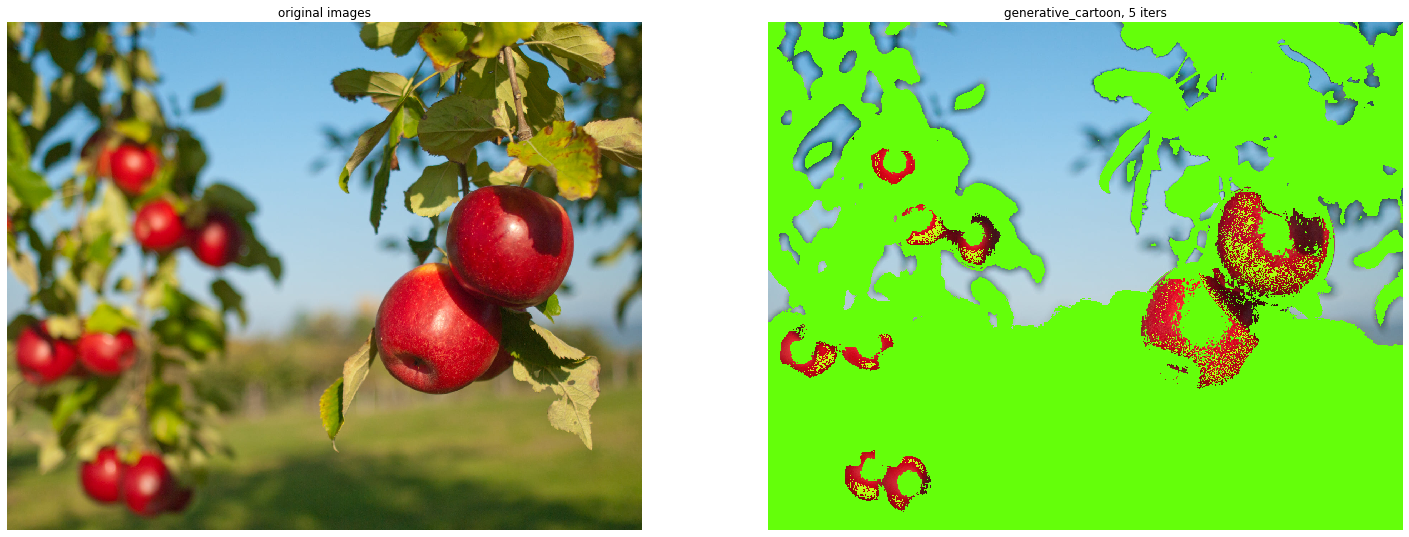

In [4]:
lower_red = np.array([87, 30, 50])
upper_red = np.array([180, 255, 255])

plt.figure(figsize = (25, 12))
plt.subplot(121); plt.imshow(img_rgb_plt), plt.title('original images'), plt.axis("off")

plt.subplot(122); b_green_RBG = extract_color_range(path_1, lower_red, upper_red)
b_green_RBG = np.where(b_green_RBG != [0,0,0], b_green_RBG, [100, 255, 10])
plt.imshow(b_green_RBG); plt.title('generative_cartoon, 5 iters'), plt.axis("off")

plt.show()

### using K-mean

In [5]:
def KMEANS_img(img, max_iter = 10, eps = 1.0, flags=cv2.KMEANS_RANDOM_CENTERS, K = 5):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    Z = img.reshape((-1,3))
    Z = np.float32(Z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, eps)
    ret, label, centers = cv2.kmeans(Z, K, None,criteria,10, flags)
    center = np.uint8(centers)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    print("centers : \n", center)
    return res2

res2 = KMEANS_img(img)

centers : 
 [[ 66  68  20]
 [132 128  51]
 [143 186 210]
 [192 166  93]
 [183  27  31]]


centers : 
 [[191 165  91]
 [ 66  68  20]
 [143 186 210]
 [183  27  31]
 [131 127  51]]


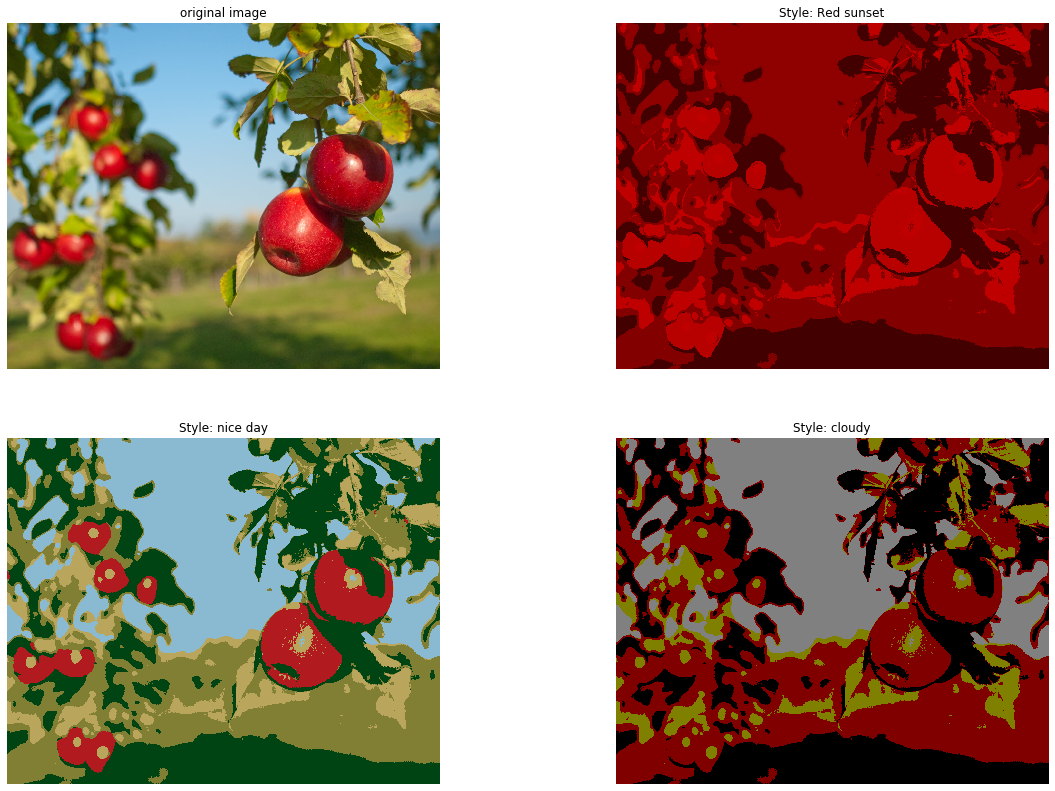

In [6]:
img = cv2.imread(r"C:\Users\Admin\Desktop\apple.jpg")
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res2 = KMEANS_img(img)
plt.figure(figsize = (20, 14))
plt.subplot(221), plt.imshow(img_rgb_plt), plt.title("original image"), plt.axis("off")
plt.subplot(222), plt.imshow(res2 & [255, 0, 0]), plt.title("Style: Red sunset"), plt.axis("off")
plt.subplot(223), plt.imshow(res2 & [185, 255, 255]), plt.title("Style: nice day"), plt.axis("off")
plt.subplot(224), plt.imshow(res2 & [128, 128, 128]), plt.title("Style: cloudy"), plt.axis("off")
plt.axis("off");

#### Example 2.

centers : 
 [[217 233 247]
 [185 172 151]
 [ 83  64  35]
 [160 125  59]
 [171  13  50]
 [ 29  22  12]]


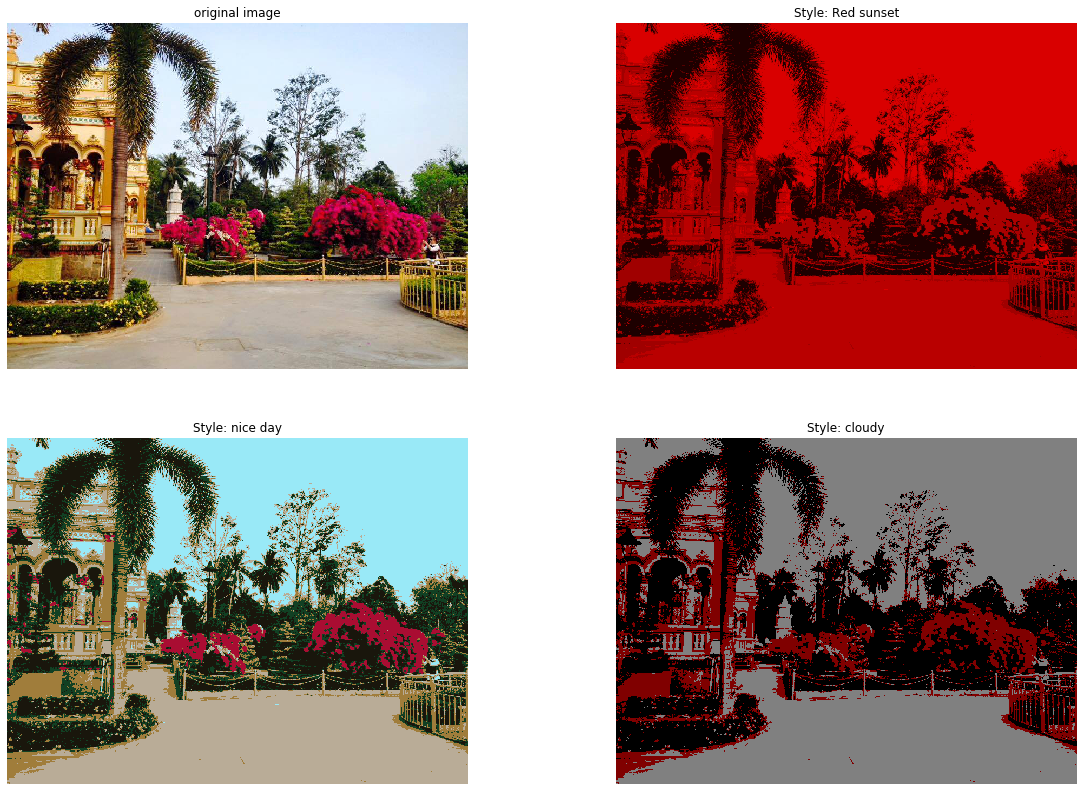

In [7]:
img = cv2.imread(r'C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\fig3.jpg')
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res2 = KMEANS_img(img, K = 6)
plt.figure(figsize = (20, 14))
plt.subplot(221), plt.imshow(img_rgb_plt), plt.title("original image"), plt.axis("off")
plt.subplot(222), plt.imshow(res2 & [255, 0, 0]), plt.title("Style: Red sunset"), plt.axis("off")
plt.subplot(223), plt.imshow(res2 & [185, 255, 255]), plt.title("Style: nice day"), plt.axis("off")
plt.subplot(224), plt.imshow(res2 & [128, 128, 128]), plt.title("Style: cloudy"), plt.axis("off")
plt.axis("off");

centers : 
 [[ 53  63  67]
 [206 201 208]]


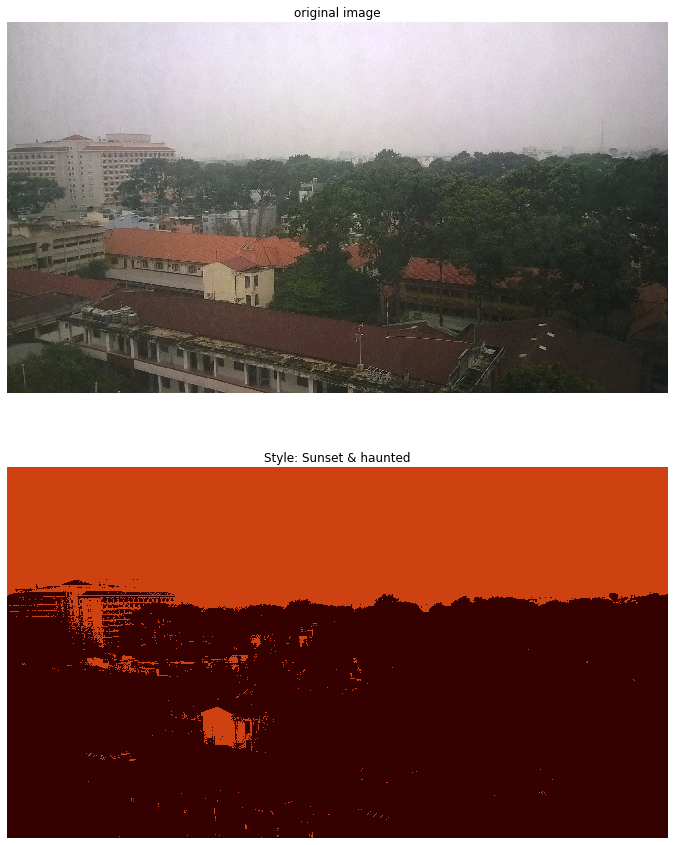

In [8]:
img = cv2.imread(r'C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\university.jpg')
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res2 = KMEANS_img(img_rgb_plt, K = 2)
plt.figure(figsize = (20, 15))
plt.subplot(211), plt.imshow(img_rgb_plt), plt.title("original image"), plt.axis("off")
plt.subplot(212), plt.imshow(res2 & [255, 65, 20]), plt.title("Style: Sunset & haunted"), plt.axis("off");

centers : 
 [[212 205 212]
 [ 97 108 117]
 [ 41  50  52]]


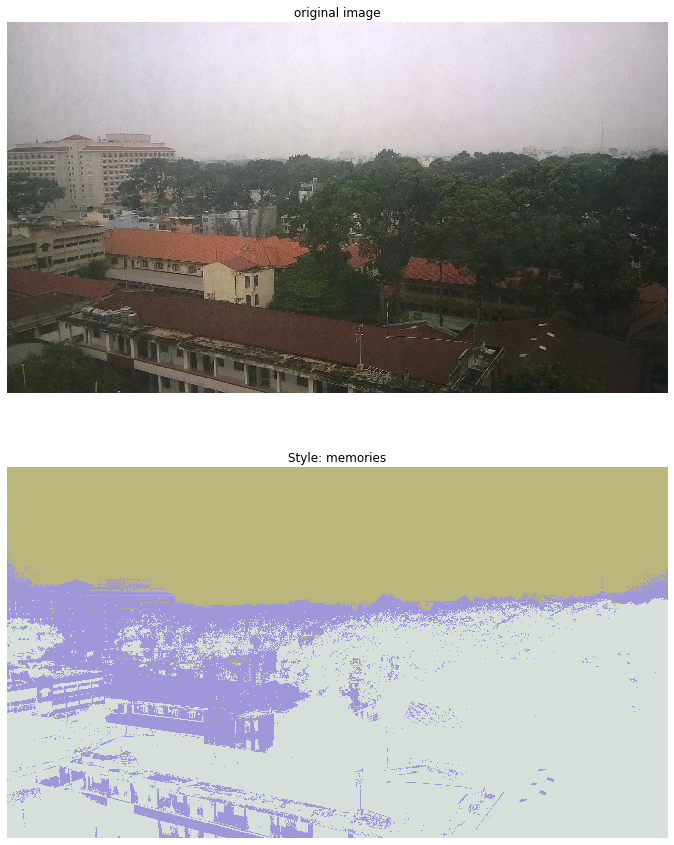

In [9]:
img = cv2.imread(r'C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\university.jpg')
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res2 = KMEANS_img(img_rgb_plt, K = 3)
plt.figure(figsize = (20, 15))
plt.subplot(211), plt.imshow(img_rgb_plt), plt.title("original image"), plt.axis("off")
plt.subplot(212), plt.imshow(~res2 | [145, 150, 90]), plt.title("Style: memories"), plt.axis("off");

centers : 
 [[135 143 150]
 [231 222 229]
 [195 191 196]
 [ 87  98 108]
 [ 53  63  68]
 [ 32  41  40]]


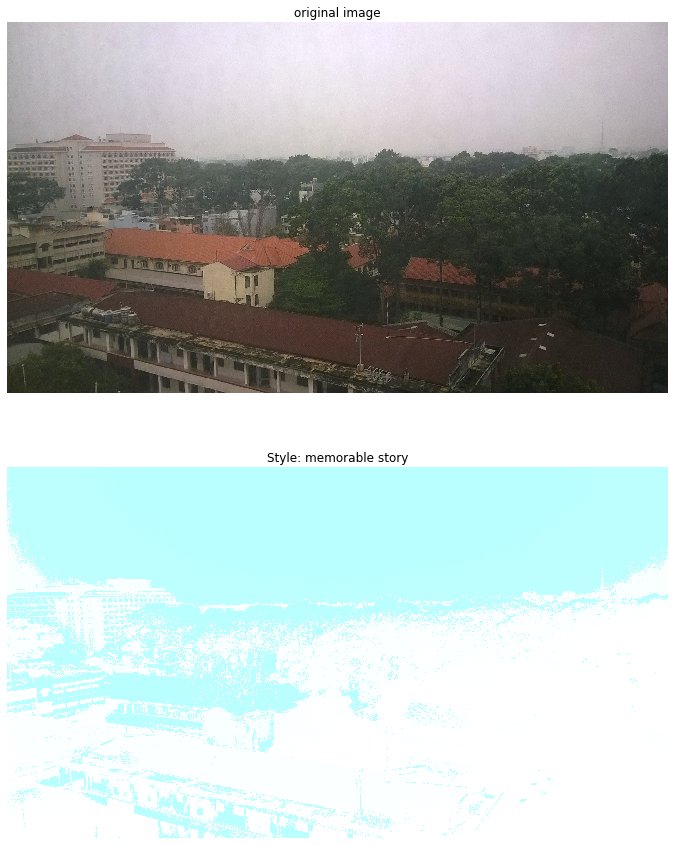

In [10]:
img = cv2.imread(r'C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\university.jpg')
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res2 = KMEANS_img(img_rgb_plt, K = 6)
plt.figure(figsize = (20, 15))
plt.subplot(211), plt.imshow(img_rgb_plt), plt.title("original image"), plt.axis("off")
plt.subplot(212), plt.imshow(~res2 | [185, 255, 255]), plt.title("Style: memorable story"), plt.axis("off");

centers : 
 [[ 35  43  44]
 [ 63  73  77]
 [187 184 189]
 [103 114 128]
 [228 219 227]]


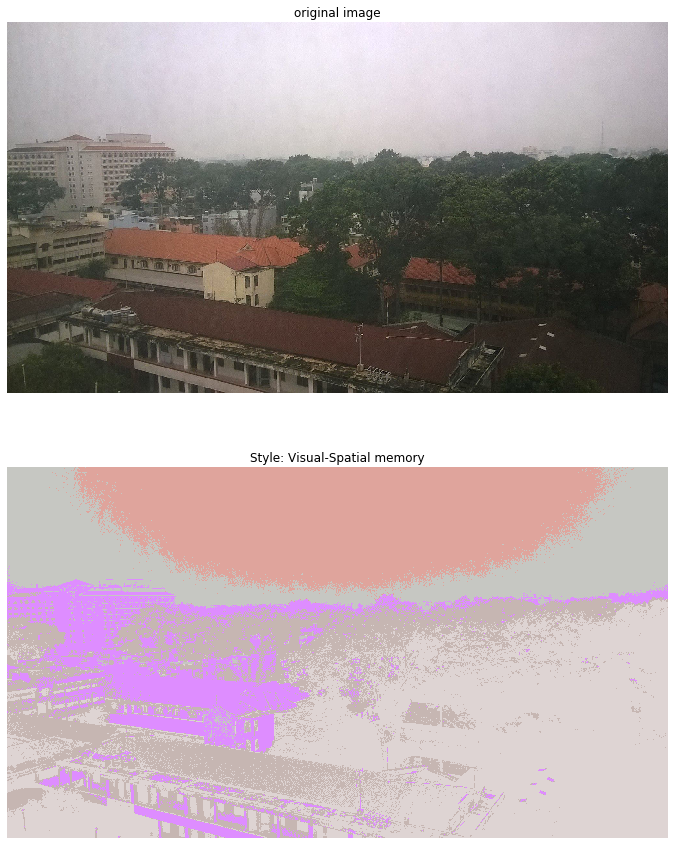

In [11]:
img = cv2.imread(r'C:\Users\Admin\Desktop\Nhan_pro\Data\computer_vision_data\university.jpg')
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res2 = KMEANS_img(img_rgb_plt, K = 5)
plt.figure(figsize = (20, 15))
plt.subplot(211), plt.imshow(img_rgb_plt), plt.title("original image"), plt.axis("off")
plt.subplot(212), plt.imshow(~res2 | [198, 128, 128]), plt.title("Style: Visual-Spatial memory"), plt.axis("off");

centers : 
 [[116 187  54]
 [177 195 126]
 [ 38  56  22]
 [150  90  57]
 [ 59 131  28]
 [240 247 235]]


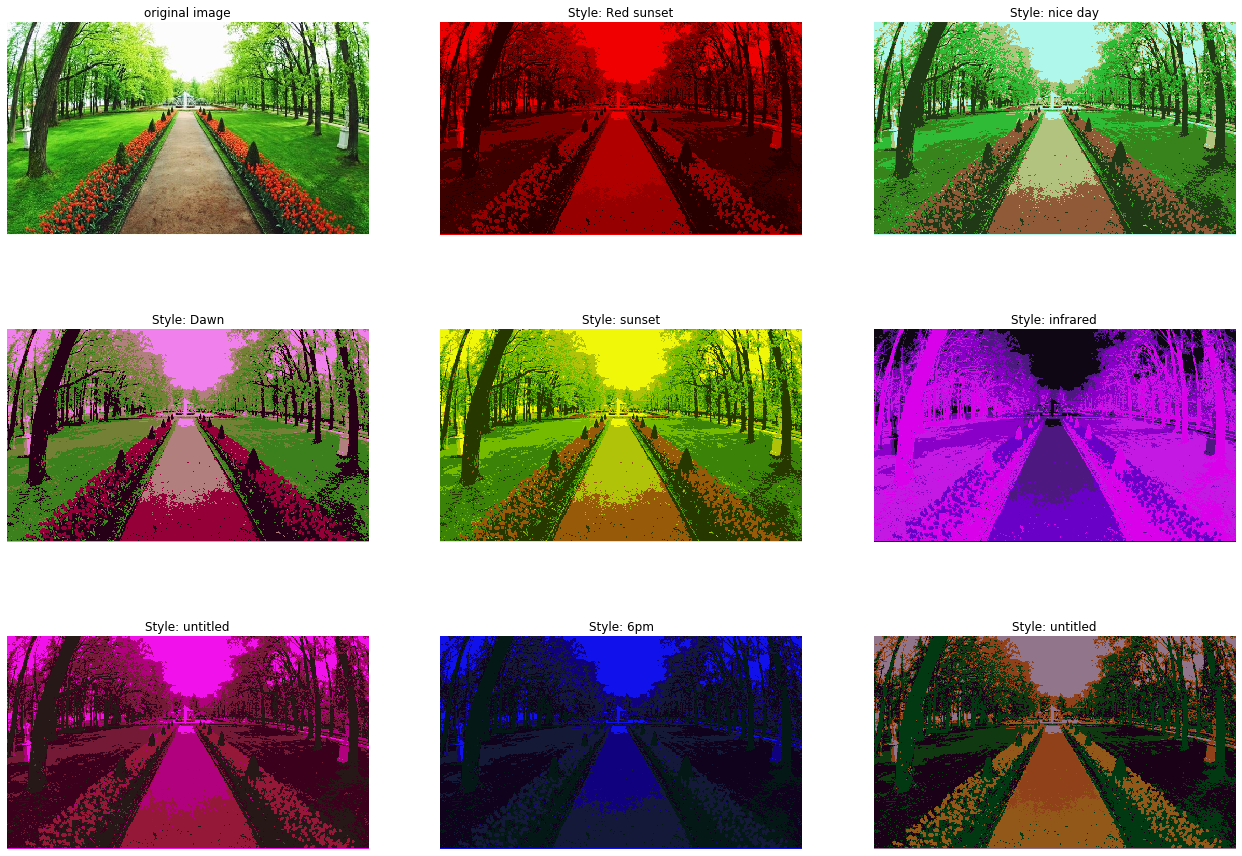

In [12]:
img = cv2.imread(r"C:\Users\Admin\Desktop\mang.JPG")
img_rgb_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res2 = KMEANS_img(img, K = 6)
plt.figure(figsize = (22, 16))
plt.subplot(331), plt.imshow(img_rgb_plt), plt.title("original image"), plt.axis("off")
plt.subplot(332), plt.imshow(res2 & [255, 0, 0]), plt.title("Style: Red sunset"), plt.axis("off")
plt.subplot(333), plt.imshow(res2 & [185, 255, 255]), plt.title("Style: nice day"), plt.axis("off")
plt.subplot(334), plt.imshow(res2 & [255, 128, 255]), plt.title("Style: Dawn"), plt.axis("off")
plt.subplot(335), plt.imshow(res2 & [255, 255, 8]), plt.title("Style: sunset"), plt.axis("off")
plt.subplot(336), plt.imshow(~res2 & [255, 25, 255]), plt.title("Style: infrared"), plt.axis("off")
plt.subplot(337), plt.imshow(res2 & [255, 25, 255]), plt.title("Style: untitled"), plt.axis("off")
plt.subplot(338), plt.imshow(res2 & [20, 25, 255]), plt.title("Style: 6pm"), plt.axis("off")
plt.subplot(339), plt.imshow(res2 & [155, 125, 155]), plt.title("Style: untitled"), plt.axis("off")
plt.axis("off");

In [ ]:
k = 0
plt.figure(figsize = (20, 16))
for vrs in [1, 4, 9, 36]:
    plt.subplot(2, 2, k+1)
    noise = np.random.normal(0, vrs, (180, 180, 3))
    noise = [np.uint8(i) for i in noise]
    plt.imshow(noise)
    plt.title("sigma = %s"%vrs)
    k += 1